In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from xgboost import XGBClassifier
from imblearn.datasets import make_imbalance 

C:\Users\Parmenides\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Importing the dataset
# Dataframe is created for initial data analysis
dataset = pd.read_csv('bank-additional-full.csv', sep = ";")
df = dataset.iloc[:,:]

In [3]:
# Data for classification is kept separated
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1:].values
y = y.ravel()
print(X)

       age            job   marital            education  default  housing  \
0       56      housemaid   married             basic.4y       no       no   
1       57       services   married          high.school  unknown       no   
2       37       services   married          high.school       no      yes   
3       40         admin.   married             basic.6y       no       no   
4       56       services   married          high.school       no       no   
5       45       services   married             basic.9y  unknown       no   
6       59         admin.   married  professional.course       no       no   
7       41    blue-collar   married              unknown  unknown       no   
8       24     technician    single  professional.course       no      yes   
9       25       services    single          high.school       no      yes   
10      41    blue-collar   married              unknown  unknown       no   
11      25       services    single          high.school       n

In [4]:
# EDA section
# Looking for missing data in all colum
# Check for missing values in all column

df.isnull().any().any()


False

In [5]:
df.shape
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


There are 41188 columns and 21 rows of unknown data type in the dataframe. 
Attribute Information:

Input variables:

Bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)
We will then check for datatype.

In [6]:
# Dropping duration column due to suggestion
df =  df.drop("duration",1)

In [7]:
# Checking if the value of age does make sense
df.loc[df['age'] > 80]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no
27802,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,2,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27805,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,5,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27808,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,6,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no
27810,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27811,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27812,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no
27813,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,7,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27814,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,3,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no
27815,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,2,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no


Well it does make sense

In [8]:
# Datatype check

Counter(X.dtypes.values)
X_float = df.select_dtypes(include=['float64'])
X_int = df.select_dtypes(include=['int64'])
print(X_float)
print(X_int)

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
0               1.1          93.994          -36.4      4.857       5191.0
1               1.1          93.994          -36.4      4.857       5191.0
2               1.1          93.994          -36.4      4.857       5191.0
3               1.1          93.994          -36.4      4.857       5191.0
4               1.1          93.994          -36.4      4.857       5191.0
5               1.1          93.994          -36.4      4.857       5191.0
6               1.1          93.994          -36.4      4.857       5191.0
7               1.1          93.994          -36.4      4.857       5191.0
8               1.1          93.994          -36.4      4.857       5191.0
9               1.1          93.994          -36.4      4.857       5191.0
10              1.1          93.994          -36.4      4.857       5191.0
11              1.1          93.994          -36.4      4.857       5191.0
12              1.1      

In [9]:
X_float.shape
X_int.shape

(41188, 4)

Both float and integer dataset are matrix with 41188 x 5 shape which leaves 10 more rows of accounted data type. Might be categorical or nan values

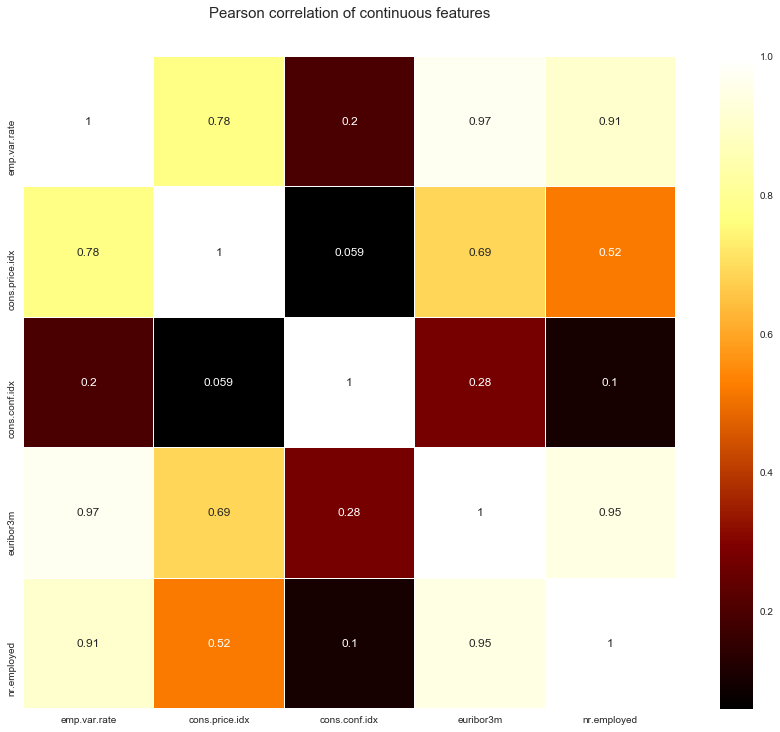

In [10]:
# Correlation plot for float

colormap = plt.cm.afmhot
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(X_float.corr(),
            linewidths=0.1,
            vmax=1.0, square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)
plt.show()

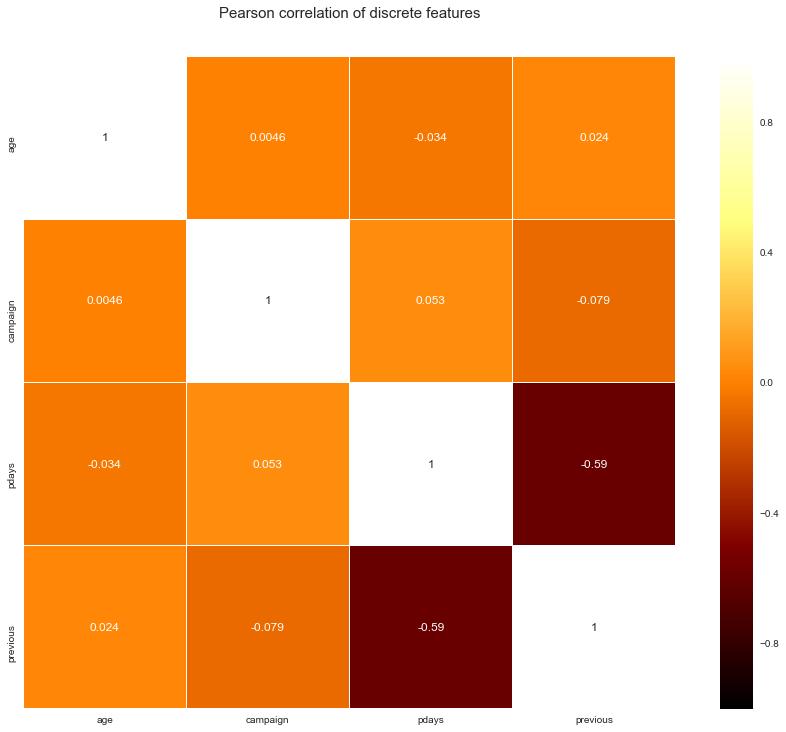

In [11]:

# Correlation plot for int

colormap = plt.cm.afmhot
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of discrete features', y=1.05, size=15)
sns.heatmap(X_int.corr(),
            linewidths=0.1,
            vmax=1.0, square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)
plt.show()

In [12]:
# Appending both discrete and continues df
frames  = [X_float, X_int]
comb_df = pd.concat(frames, axis = 1)
print(comb_df)

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0               1.1          93.994          -36.4      4.857       5191.0   
1               1.1          93.994          -36.4      4.857       5191.0   
2               1.1          93.994          -36.4      4.857       5191.0   
3               1.1          93.994          -36.4      4.857       5191.0   
4               1.1          93.994          -36.4      4.857       5191.0   
5               1.1          93.994          -36.4      4.857       5191.0   
6               1.1          93.994          -36.4      4.857       5191.0   
7               1.1          93.994          -36.4      4.857       5191.0   
8               1.1          93.994          -36.4      4.857       5191.0   
9               1.1          93.994          -36.4      4.857       5191.0   
10              1.1          93.994          -36.4      4.857       5191.0   
11              1.1          93.994          -36.4      4.857   

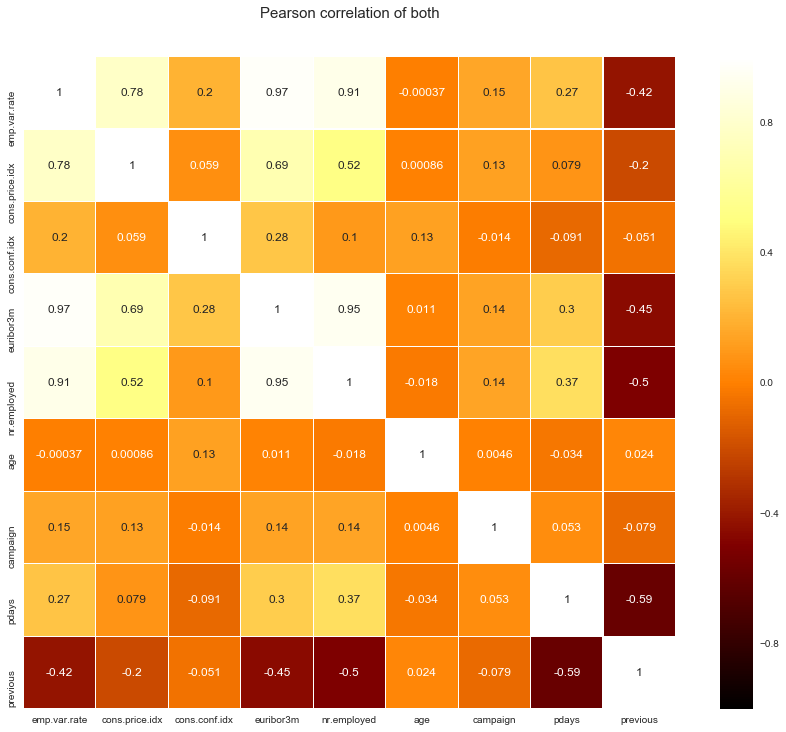

In [13]:
# And then see correlation
colormap = plt.cm.afmhot
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of both', y=1.05, size=15)
sns.heatmap(comb_df.corr(),
            linewidths=0.1,
            vmax=1.0, square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)
plt.show()

All the features isnt correlated to each other which means every feature contained unique information that can help us in predictiing the outcome. The economic indicators however are highly correlated to each other.

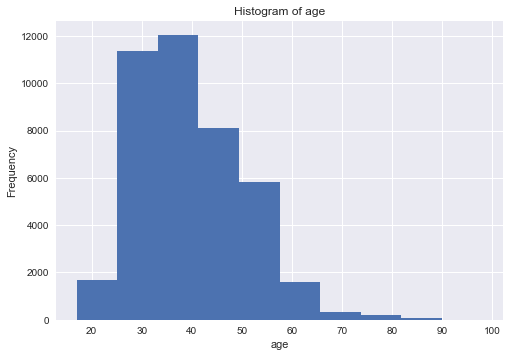

In [14]:
# Drawing histogram for every single discrete datatype
plt.hist(df['age'])
plt.title("Histogram of age")
plt.xlabel("age")
plt.ylabel("Frequency")
plt.show()

Why would they try to contact 90 years old customers? He or she is close to death. They dont care about banks anymore, because they are busy choosing their own casket. Anomaly maybe? Might need to remove. We need to do feature importance but we need to change categorical data to numerical first.


In [15]:
# Dropping duration column in X too
X = X.drop('duration',1)

In [16]:
# Limiting to only categorical object

X = X.select_dtypes(include=[object])

# one hot encoding on all the categories variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
X = X.apply(le.fit_transform)

enc = OneHotEncoder()
X = enc.fit_transform(X).toarray()

# Non categorical part
frames  = [X_float, X_int]
X_nc = pd.concat(frames, axis = 1).values

# Appending both
X = np.hstack((X,X_nc))

# Label encoding for y
le_y = LabelEncoder()
y = le_y.fit_transform(y)
       
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Show the result
print(X)
X.shape

[[-0.58202282 -0.53831699 -0.19143021 ..., -0.56592197  0.1954139
  -0.34949428]
 [-0.58202282 -0.53831699 -0.19143021 ..., -0.56592197  0.1954139
  -0.34949428]
 [-0.58202282 -0.53831699 -0.19143021 ..., -0.56592197  0.1954139
  -0.34949428]
 ..., 
 [-0.58202282 -0.53831699 -0.19143021 ..., -0.20490853  0.1954139
  -0.34949428]
 [-0.58202282 -0.53831699 -0.19143021 ..., -0.56592197  0.1954139
  -0.34949428]
 [-0.58202282 -0.53831699 -0.19143021 ...,  0.15610492  0.1954139
   1.67113606]]


(41188, 62)

In [17]:
# feature extraction
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(X, y)
importances = et.feature_importances_

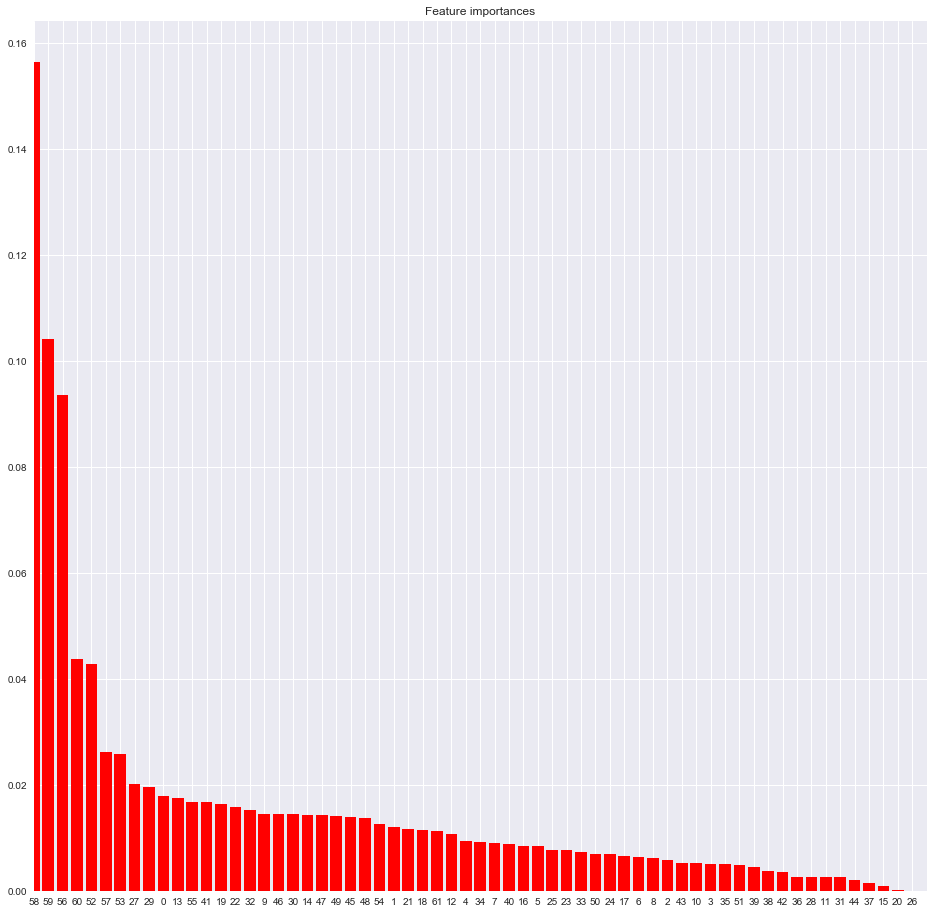

In [19]:

# Plot the feature importances of the forest
indices = np.argsort(importances)[::-1]
width = 16
height = 16
plt.figure(figsize=(width, height))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-0.001, X.shape[1]])
plt.show()

In [23]:
# Making imbalanced

X, y = make_imbalance(X, y,ratio = {0:4640, 1:4640})
    
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.15)

# Splitting the dataset into the Training set and validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.15)

In [34]:
# Machine learning part
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()
    
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 62, kernel_initializer = 'uniform', activation = 'relu', input_dim = 62))
    
# Adding the second hidden layer
classifier.add(Dense(units = 120, kernel_initializer = 'uniform', activation = 'relu'))
    
# Adding the Second layer
classifier.add(Dense(units = 120, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))
    
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 1000, epochs = 40)

Epoch 1/40
6704/6704 [==============================] - 1s - loss: 2.0789 - acc: 0.5000      
Epoch 2/40
6704/6704 [==============================] - 0s - loss: 1.1403 - acc: 0.5001     
Epoch 3/40
6704/6704 [==============================] - 0s - loss: 0.6923 - acc: 0.6198     
Epoch 4/40
6704/6704 [==============================] - 0s - loss: 0.8313 - acc: 0.6647     
Epoch 5/40
6704/6704 [==============================] - 0s - loss: 0.7772 - acc: 0.6802     
Epoch 6/40
6704/6704 [==============================] - 0s - loss: 0.6427 - acc: 0.7082     
Epoch 7/40
6704/6704 [==============================] - 0s - loss: 0.5958 - acc: 0.6930     
Epoch 8/40
6704/6704 [==============================] - 0s - loss: 0.5808 - acc: 0.7161     
Epoch 9/40
6704/6704 [==============================] - 0s - loss: 0.6040 - acc: 0.7345     
Epoch 10/40
6704/6704 [==============================] - 0s - loss: 0.6166 - acc: 0.7406     
Epoch 11/40
6704/6704 [==============================] - 0s - loss: 

There are many good non complicated algoritm that can be use for classification but i think i should just use ANN. You know why? Because i like to show off..LOL!!!

In [33]:
# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
        classifier = Sequential()
        classifier.add(Dense(units = 62, kernel_initializer = 'uniform', activation = 'relu', input_dim = 62))
        classifier.add(Dense(units = 120, kernel_initializer = 'uniform', activation = 'relu'))
        classifier.add(Dense(units = 120, kernel_initializer = 'uniform', activation = 'relu'))
        classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))
        classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
        return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [200, 400,600,800,1000],
                  'epochs': [20,40,60,80,100,120,140,160,180,200],
              'optimizer': ['adam', 'rmsprop']}
grid_search = RandomizedSearchCV(estimator = classifier,
                               param_distributions = parameters,
                               scoring = 'f1',
                               cv = 5)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(best_parameters)

Epoch 1/100
5363/5363 [==============================] - 0s - loss: 2.0102 - acc: 0.5018     
Epoch 2/100
5363/5363 [==============================] - 0s - loss: 0.9659 - acc: 0.5090     
Epoch 3/100
5363/5363 [==============================] - 0s - loss: 0.6580 - acc: 0.6452     
Epoch 4/100
5363/5363 [==============================] - 0s - loss: 0.6512 - acc: 0.7169     
Epoch 5/100
5363/5363 [==============================] - 0s - loss: 0.6157 - acc: 0.7263     
Epoch 6/100
5363/5363 [==============================] - 0s - loss: 0.6183 - acc: 0.7363     
Epoch 7/100
5363/5363 [==============================] - 0s - loss: 0.5955 - acc: 0.7337     
Epoch 8/100
5363/5363 [==============================] - 0s - loss: 0.5844 - acc: 0.7367     
Epoch 9/100
5363/5363 [==============================] - 0s - loss: 0.5785 - acc: 0.7391     
Epoch 10/100
5363/5363 [==============================] - 0s - loss: 0.5578 - acc: 0.7356     
Epoch 11/100
5363/5363 [==============================] - 0

5363/5363 [==============================] - 0s - loss: 0.4132 - acc: 0.7844     
Epoch 88/100
5363/5363 [==============================] - 0s - loss: 0.4189 - acc: 0.7815     
Epoch 89/100
5363/5363 [==============================] - 0s - loss: 0.4057 - acc: 0.7826     
Epoch 90/100
5363/5363 [==============================] - 0s - loss: 0.4300 - acc: 0.7755     
Epoch 91/100
5363/5363 [==============================] - 0s - loss: 0.3881 - acc: 0.7902     
Epoch 92/100
5363/5363 [==============================] - 0s - loss: 0.5053 - acc: 0.7608     
Epoch 93/100
5363/5363 [==============================] - 0s - loss: 0.3978 - acc: 0.7844     
Epoch 94/100
5363/5363 [==============================] - 0s - loss: 0.3833 - acc: 0.7859     
Epoch 95/100
5363/5363 [==============================] - 0s - loss: 0.4989 - acc: 0.7531     
Epoch 96/100
5363/5363 [==============================] - 0s - loss: 0.3919 - acc: 0.7904     
Epoch 97/100
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.4887 - acc: 0.7608     
Epoch 73/100
5363/5363 [==============================] - 0s - loss: 0.4295 - acc: 0.7796     
Epoch 74/100
5363/5363 [==============================] - 0s - loss: 0.4847 - acc: 0.7583     
Epoch 75/100
5363/5363 [==============================] - 0s - loss: 0.4180 - acc: 0.7811     
Epoch 76/100
5363/5363 [==============================] - 0s - loss: 0.4493 - acc: 0.7679     
Epoch 77/100
5363/5363 [==============================] - 0s - loss: 0.4243 - acc: 0.7755     
Epoch 78/100
5363/5363 [==============================] - 0s - loss: 0.5078 - acc: 0.7567     
Epoch 79/100
5363/5363 [==============================] - 0s - loss: 0.4089 - acc: 0.7811     
Epoch 80/100
5363/5363 [==============================] - 0s - loss: 0.4069 - acc: 0.7807     
Epoch 81/100
5363/5363 [==============================] - 0s - loss: 0.4604 - acc: 0.7671     
Epoch 82/100
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.4930 - acc: 0.7593     
Epoch 58/100
5363/5363 [==============================] - 0s - loss: 0.4518 - acc: 0.7679     
Epoch 59/100
5363/5363 [==============================] - 0s - loss: 0.4952 - acc: 0.7632     
Epoch 60/100
5363/5363 [==============================] - 0s - loss: 0.4460 - acc: 0.7731     
Epoch 61/100
5363/5363 [==============================] - 0s - loss: 0.5041 - acc: 0.7511     
Epoch 62/100
5363/5363 [==============================] - 0s - loss: 0.4578 - acc: 0.7692     
Epoch 63/100
5363/5363 [==============================] - 0s - loss: 0.4428 - acc: 0.7679     
Epoch 64/100
5363/5363 [==============================] - 0s - loss: 0.4693 - acc: 0.7610     
Epoch 65/100
5363/5363 [==============================] - 0s - loss: 0.4474 - acc: 0.7703     
Epoch 66/100
5363/5363 [==============================] - 0s - loss: 0.4778 - acc: 0.7544     
Epoch 67/100
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.5134 - acc: 0.7416     
Epoch 43/100
5363/5363 [==============================] - 0s - loss: 0.4829 - acc: 0.7602     
Epoch 44/100
5363/5363 [==============================] - 0s - loss: 0.4824 - acc: 0.7626     
Epoch 45/100
5363/5363 [==============================] - 0s - loss: 0.4792 - acc: 0.7582     
Epoch 46/100
5363/5363 [==============================] - 0s - loss: 0.4821 - acc: 0.7617     
Epoch 47/100
5363/5363 [==============================] - 0s - loss: 0.4848 - acc: 0.7583     
Epoch 48/100
5363/5363 [==============================] - 0s - loss: 0.4941 - acc: 0.7583     
Epoch 49/100
5363/5363 [==============================] - 0s - loss: 0.4834 - acc: 0.7580     
Epoch 50/100
5363/5363 [==============================] - 0s - loss: 0.5041 - acc: 0.7552     
Epoch 51/100
5363/5363 [==============================] - 0s - loss: 0.4798 - acc: 0.7615     
Epoch 52/100
5363/5363 [==============================] - 0s - 

5364/5364 [==============================] - 0s - loss: 0.5262 - acc: 0.7528     
Epoch 28/100
5364/5364 [==============================] - 0s - loss: 0.5206 - acc: 0.7543     
Epoch 29/100
5364/5364 [==============================] - 0s - loss: 0.5155 - acc: 0.7565     
Epoch 30/100
5364/5364 [==============================] - 0s - loss: 0.5145 - acc: 0.7519     
Epoch 31/100
5364/5364 [==============================] - 0s - loss: 0.5225 - acc: 0.7535     
Epoch 32/100
5364/5364 [==============================] - 0s - loss: 0.5170 - acc: 0.7545     
Epoch 33/100
5364/5364 [==============================] - 0s - loss: 0.5315 - acc: 0.7481     
Epoch 34/100
5364/5364 [==============================] - 0s - loss: 0.5519 - acc: 0.7362     
Epoch 35/100
5364/5364 [==============================] - 0s - loss: 0.5262 - acc: 0.7558     
Epoch 36/100
5364/5364 [==============================] - 0s - loss: 0.5148 - acc: 0.7519     
Epoch 37/100
5364/5364 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.5369 - acc: 0.7434     
Epoch 13/180
5363/5363 [==============================] - 0s - loss: 0.5337 - acc: 0.7431     
Epoch 14/180
5363/5363 [==============================] - 0s - loss: 0.5418 - acc: 0.7425     
Epoch 15/180
5363/5363 [==============================] - 0s - loss: 0.5328 - acc: 0.7436     
Epoch 16/180
5363/5363 [==============================] - 0s - loss: 0.5315 - acc: 0.7451     
Epoch 17/180
5363/5363 [==============================] - 0s - loss: 0.5316 - acc: 0.7425     
Epoch 18/180
5363/5363 [==============================] - 0s - loss: 0.5271 - acc: 0.7449     
Epoch 19/180
5363/5363 [==============================] - 0s - loss: 0.5239 - acc: 0.7449     
Epoch 20/180
5363/5363 [==============================] - 0s - loss: 0.5224 - acc: 0.7466     
Epoch 21/180
5363/5363 [==============================] - 0s - loss: 0.5206 - acc: 0.7466     
Epoch 22/180
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.4827 - acc: 0.7645     
Epoch 99/180
5363/5363 [==============================] - 0s - loss: 0.4815 - acc: 0.7639     
Epoch 100/180
5363/5363 [==============================] - 0s - loss: 0.4801 - acc: 0.7658     
Epoch 101/180
5363/5363 [==============================] - 0s - loss: 0.4770 - acc: 0.7652     
Epoch 102/180
5363/5363 [==============================] - 0s - loss: 0.4767 - acc: 0.7639     
Epoch 103/180
5363/5363 [==============================] - 0s - loss: 0.4746 - acc: 0.7654     
Epoch 104/180
5363/5363 [==============================] - 0s - loss: 0.4720 - acc: 0.7688     
Epoch 105/180
5363/5363 [==============================] - 0s - loss: 0.4706 - acc: 0.7632     
Epoch 106/180
5363/5363 [==============================] - 0s - loss: 0.4692 - acc: 0.7692     
Epoch 107/180
5363/5363 [==============================] - 0s - loss: 0.4685 - acc: 0.7729     
Epoch 108/180
5363/5363 [==============================

5363/5363 [==============================] - 0s - loss: 0.8201 - acc: 0.5538     
Epoch 3/180
5363/5363 [==============================] - 0s - loss: 0.7051 - acc: 0.6985     
Epoch 4/180
5363/5363 [==============================] - 0s - loss: 0.6168 - acc: 0.6731     
Epoch 5/180
5363/5363 [==============================] - 0s - loss: 0.6167 - acc: 0.6970     
Epoch 6/180
5363/5363 [==============================] - 0s - loss: 0.6314 - acc: 0.7114     
Epoch 7/180
5363/5363 [==============================] - 0s - loss: 0.6622 - acc: 0.6103     
Epoch 8/180
5363/5363 [==============================] - 0s - loss: 0.6213 - acc: 0.6968     
Epoch 9/180
5363/5363 [==============================] - 0s - loss: 0.6264 - acc: 0.7304     
Epoch 10/180
5363/5363 [==============================] - 0s - loss: 0.5936 - acc: 0.7326     
Epoch 11/180
5363/5363 [==============================] - 0s - loss: 0.5878 - acc: 0.7339     
Epoch 12/180
5363/5363 [==============================] - 0s - loss: 0

5363/5363 [==============================] - 0s - loss: 0.4262 - acc: 0.7727     
Epoch 89/180
5363/5363 [==============================] - 0s - loss: 0.4223 - acc: 0.7630     
Epoch 90/180
5363/5363 [==============================] - 0s - loss: 0.4165 - acc: 0.7669     
Epoch 91/180
5363/5363 [==============================] - 0s - loss: 0.4143 - acc: 0.7626     
Epoch 92/180
5363/5363 [==============================] - 0s - loss: 0.4080 - acc: 0.7613     
Epoch 93/180
5363/5363 [==============================] - 0s - loss: 0.4053 - acc: 0.7582     
Epoch 94/180
5363/5363 [==============================] - 0s - loss: 0.4004 - acc: 0.7608     
Epoch 95/180
5363/5363 [==============================] - 0s - loss: 0.3967 - acc: 0.7563     
Epoch 96/180
5363/5363 [==============================] - 0s - loss: 0.3956 - acc: 0.7576     
Epoch 97/180
5363/5363 [==============================] - 0s - loss: 0.3999 - acc: 0.7509     
Epoch 98/180
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.2651 - acc: 0.7401     
Epoch 174/180
5363/5363 [==============================] - 0s - loss: 0.2564 - acc: 0.7496     
Epoch 175/180
5363/5363 [==============================] - 0s - loss: 0.2528 - acc: 0.7391     
Epoch 176/180
5363/5363 [==============================] - 0s - loss: 0.2622 - acc: 0.7371     
Epoch 177/180
5363/5363 [==============================] - 0s - loss: 0.2502 - acc: 0.7386     
Epoch 178/180
5363/5363 [==============================] - 0s - loss: 0.2448 - acc: 0.7311     
Epoch 179/180
5363/5363 [==============================] - 0s - loss: 0.2351 - acc: 0.7417     
Epoch 180/180
5363/5363 [==============================] - 1s - loss: 1.9563 - acc: 0.4964     
Epoch 2/180
5363/5363 [==============================] - 0s - loss: 0.7943 - acc: 0.5657     
Epoch 3/180
5363/5363 [==============================] - 0s - loss: 0.7403 - acc: 0.6959     
Epoch 4/180
5363/5363 [==============================] - 0

5363/5363 [==============================] - 0s - loss: 0.3779 - acc: 0.7815     
Epoch 79/180
5363/5363 [==============================] - 0s - loss: 0.3719 - acc: 0.7848     
Epoch 80/180
5363/5363 [==============================] - 0s - loss: 0.3671 - acc: 0.7848     
Epoch 81/180
5363/5363 [==============================] - 0s - loss: 0.3774 - acc: 0.7865     
Epoch 82/180
5363/5363 [==============================] - 0s - loss: 0.3775 - acc: 0.7820     
Epoch 83/180
5363/5363 [==============================] - 0s - loss: 0.4054 - acc: 0.7720     
Epoch 84/180
5363/5363 [==============================] - 0s - loss: 0.4921 - acc: 0.7664     
Epoch 85/180
5363/5363 [==============================] - 0s - loss: 0.4525 - acc: 0.7688     
Epoch 86/180
5363/5363 [==============================] - 0s - loss: 0.4040 - acc: 0.7932     
Epoch 87/180
5363/5363 [==============================] - 0s - loss: 0.3849 - acc: 0.7938     
Epoch 88/180
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.3066 - acc: 0.7652     
Epoch 164/180
5363/5363 [==============================] - 0s - loss: 0.3060 - acc: 0.7565     
Epoch 165/180
5363/5363 [==============================] - 0s - loss: 0.2984 - acc: 0.7604     
Epoch 166/180
5363/5363 [==============================] - 0s - loss: 0.2920 - acc: 0.7583     
Epoch 167/180
5363/5363 [==============================] - 0s - loss: 0.2873 - acc: 0.7570     
Epoch 168/180
5363/5363 [==============================] - 0s - loss: 0.2818 - acc: 0.7539     
Epoch 169/180
5363/5363 [==============================] - 0s - loss: 0.2762 - acc: 0.7544     
Epoch 170/180
5363/5363 [==============================] - 0s - loss: 0.2705 - acc: 0.7498     
Epoch 171/180
5363/5363 [==============================] - 0s - loss: 0.2687 - acc: 0.7542     
Epoch 172/180
5363/5363 [==============================] - 0s - loss: 0.2642 - acc: 0.7423     
Epoch 173/180
5363/5363 [=============================

5363/5363 [==============================] - 0s - loss: 0.4449 - acc: 0.7671     
Epoch 69/180
5363/5363 [==============================] - 0s - loss: 0.4419 - acc: 0.7660     
Epoch 70/180
5363/5363 [==============================] - 0s - loss: 0.4433 - acc: 0.7682     
Epoch 71/180
5363/5363 [==============================] - 0s - loss: 0.4452 - acc: 0.7610     
Epoch 72/180
5363/5363 [==============================] - 0s - loss: 0.4332 - acc: 0.7647     
Epoch 73/180
5363/5363 [==============================] - 0s - loss: 0.4256 - acc: 0.7684     
Epoch 74/180
5363/5363 [==============================] - 0s - loss: 0.4193 - acc: 0.7667     
Epoch 75/180
5363/5363 [==============================] - ETA: 0s - loss: 0.4156 - acc: 0.780 - 0s - loss: 0.4186 - acc: 0.7682     
Epoch 76/180
5363/5363 [==============================] - 0s - loss: 0.4173 - acc: 0.7585     
Epoch 77/180
5363/5363 [==============================] - 0s - loss: 0.4115 - acc: 0.7710     
Epoch 78/180
5363/5363 [=

5363/5363 [==============================] - 0s - loss: 0.3516 - acc: 0.7567     
Epoch 154/180
5363/5363 [==============================] - 0s - loss: 0.3482 - acc: 0.7583     
Epoch 155/180
5363/5363 [==============================] - 0s - loss: 0.3447 - acc: 0.7546     
Epoch 156/180
5363/5363 [==============================] - 0s - loss: 0.3417 - acc: 0.7548     
Epoch 157/180
5363/5363 [==============================] - 0s - loss: 0.3359 - acc: 0.7490     
Epoch 158/180
5363/5363 [==============================] - 0s - loss: 0.3346 - acc: 0.7492     
Epoch 159/180
5363/5363 [==============================] - 0s - loss: 0.3268 - acc: 0.7498     
Epoch 160/180
5363/5363 [==============================] - 0s - loss: 0.3211 - acc: 0.7462     
Epoch 161/180
5363/5363 [==============================] - 0s - loss: 0.3172 - acc: 0.7447     
Epoch 162/180
5363/5363 [==============================] - 0s - loss: 0.3129 - acc: 0.7410     
Epoch 163/180
5363/5363 [=============================

5364/5364 [==============================] - 0s - loss: 0.4855 - acc: 0.7589     
Epoch 59/180
5364/5364 [==============================] - 0s - loss: 0.4833 - acc: 0.7604     
Epoch 60/180
5364/5364 [==============================] - 0s - loss: 0.4806 - acc: 0.7619     
Epoch 61/180
5364/5364 [==============================] - 0s - loss: 0.4779 - acc: 0.7625     
Epoch 62/180
5364/5364 [==============================] - 0s - loss: 0.4764 - acc: 0.7617     
Epoch 63/180
5364/5364 [==============================] - 0s - loss: 0.4746 - acc: 0.7621     
Epoch 64/180
5364/5364 [==============================] - 0s - loss: 0.4726 - acc: 0.7616     
Epoch 65/180
5364/5364 [==============================] - 0s - loss: 0.4700 - acc: 0.7619     
Epoch 66/180
5364/5364 [==============================] - 0s - loss: 0.4675 - acc: 0.7642     
Epoch 67/180
5364/5364 [==============================] - 0s - loss: 0.4655 - acc: 0.7655     
Epoch 68/180
5364/5364 [==============================] - 0s - 

5364/5364 [==============================] - 0s - loss: 0.3732 - acc: 0.7375     
Epoch 144/180
5364/5364 [==============================] - 0s - loss: 0.4175 - acc: 0.7444     
Epoch 145/180
5364/5364 [==============================] - 0s - loss: 0.3968 - acc: 0.7494     
Epoch 146/180
5364/5364 [==============================] - 0s - loss: 0.3800 - acc: 0.7530     
Epoch 147/180
5364/5364 [==============================] - 0s - loss: 0.3678 - acc: 0.7532     
Epoch 148/180
5364/5364 [==============================] - 0s - loss: 0.3592 - acc: 0.7431     
Epoch 149/180
5364/5364 [==============================] - 0s - loss: 0.3544 - acc: 0.7500     
Epoch 150/180
5364/5364 [==============================] - 0s - loss: 0.3469 - acc: 0.7422     
Epoch 151/180
5364/5364 [==============================] - 0s - loss: 0.3401 - acc: 0.7414     
Epoch 152/180
5364/5364 [==============================] - 0s - loss: 0.3352 - acc: 0.7383     
Epoch 153/180
5364/5364 [=============================

5363/5363 [==============================] - 0s - loss: 0.5764 - acc: 0.7222     
Epoch 9/40
5363/5363 [==============================] - 0s - loss: 0.5804 - acc: 0.7352     
Epoch 10/40
5363/5363 [==============================] - 0s - loss: 0.5833 - acc: 0.7362     
Epoch 11/40
5363/5363 [==============================] - 0s - loss: 0.5710 - acc: 0.7382     
Epoch 12/40
5363/5363 [==============================] - 0s - loss: 0.5658 - acc: 0.7423     
Epoch 13/40
5363/5363 [==============================] - 0s - loss: 0.5638 - acc: 0.7432     
Epoch 14/40
5363/5363 [==============================] - 0s - loss: 0.5571 - acc: 0.7406     
Epoch 15/40
5363/5363 [==============================] - 0s - loss: 0.5487 - acc: 0.7427     
Epoch 16/40
5363/5363 [==============================] - 0s - loss: 0.5522 - acc: 0.7425     
Epoch 17/40
5363/5363 [==============================] - 0s - loss: 0.5526 - acc: 0.7397     
Epoch 18/40
5363/5363 [==============================] - 0s - loss: 0.537

5363/5363 [==============================] - 0s - loss: 0.5445 - acc: 0.7386     
Epoch 15/40
5363/5363 [==============================] - 0s - loss: 0.5710 - acc: 0.7416     
Epoch 16/40
5363/5363 [==============================] - 0s - loss: 0.5479 - acc: 0.7393     
Epoch 17/40
5363/5363 [==============================] - 0s - loss: 0.5478 - acc: 0.7360     
Epoch 18/40
5363/5363 [==============================] - 0s - loss: 0.5402 - acc: 0.7395     
Epoch 19/40
5363/5363 [==============================] - 0s - loss: 0.5429 - acc: 0.7419     
Epoch 20/40
5363/5363 [==============================] - 0s - loss: 0.5344 - acc: 0.7417     
Epoch 21/40
5363/5363 [==============================] - 0s - loss: 0.5289 - acc: 0.7419     
Epoch 22/40
5363/5363 [==============================] - 0s - loss: 0.5270 - acc: 0.7455     
Epoch 23/40
5363/5363 [==============================] - 0s - loss: 0.5240 - acc: 0.7436     
Epoch 24/40
5363/5363 [==============================] - 0s - loss: 0.52

5363/5363 [==============================] - 0s - loss: 0.5427 - acc: 0.7427     
Epoch 21/40
5363/5363 [==============================] - 0s - loss: 0.5456 - acc: 0.7423     
Epoch 22/40
5363/5363 [==============================] - 0s - loss: 0.5403 - acc: 0.7436     
Epoch 23/40
5363/5363 [==============================] - 0s - loss: 0.5333 - acc: 0.7425     
Epoch 24/40
5363/5363 [==============================] - 0s - loss: 0.5391 - acc: 0.7417     
Epoch 25/40
5363/5363 [==============================] - 0s - loss: 0.6777 - acc: 0.6174     
Epoch 26/40
5363/5363 [==============================] - 0s - loss: 1.0045 - acc: 0.5018     
Epoch 27/40
5363/5363 [==============================] - 0s - loss: 0.9570 - acc: 0.5023     
Epoch 28/40
5363/5363 [==============================] - 0s - loss: 0.7170 - acc: 0.5769     
Epoch 29/40
5363/5363 [==============================] - 0s - loss: 0.6174 - acc: 0.7276     
Epoch 30/40
5363/5363 [==============================] - 0s - loss: 0.75

5363/5363 [==============================] - 0s - loss: 0.5243 - acc: 0.7475     
Epoch 27/40
5363/5363 [==============================] - 0s - loss: 0.5224 - acc: 0.7509     
Epoch 28/40
5363/5363 [==============================] - 0s - loss: 0.5230 - acc: 0.7481     
Epoch 29/40
5363/5363 [==============================] - 0s - loss: 0.5265 - acc: 0.7477     
Epoch 30/40
5363/5363 [==============================] - 0s - loss: 0.5180 - acc: 0.7462     
Epoch 31/40
5363/5363 [==============================] - 0s - loss: 0.5187 - acc: 0.7488     
Epoch 32/40
5363/5363 [==============================] - 0s - loss: 0.5184 - acc: 0.7481     
Epoch 33/40
5363/5363 [==============================] - 0s - loss: 0.5121 - acc: 0.7507     
Epoch 34/40
5363/5363 [==============================] - 0s - loss: 0.5120 - acc: 0.7513     
Epoch 35/40
5363/5363 [==============================] - 0s - loss: 0.5075 - acc: 0.7522     
Epoch 36/40
5363/5363 [==============================] - 0s - loss: 0.50

5364/5364 [==============================] - 0s - loss: 0.5582 - acc: 0.7470     
Epoch 32/40
5364/5364 [==============================] - 0s - loss: 0.5393 - acc: 0.7483     
Epoch 33/40
5364/5364 [==============================] - 0s - loss: 0.5362 - acc: 0.7442     
Epoch 34/40
5364/5364 [==============================] - 0s - loss: 0.5346 - acc: 0.7440     
Epoch 35/40
5364/5364 [==============================] - 0s - loss: 0.5331 - acc: 0.7446     
Epoch 36/40
5364/5364 [==============================] - 0s - loss: 0.5323 - acc: 0.7448     
Epoch 37/40
5364/5364 [==============================] - 0s - loss: 0.5314 - acc: 0.7437     
Epoch 38/40
5364/5364 [==============================] - 0s - loss: 0.5304 - acc: 0.7455     
Epoch 39/40
5364/5364 [==============================] - 0s - loss: 0.5296 - acc: 0.7472     
Epoch 40/40
5363/5363 [==============================] - 1s - loss: 1.1281 - acc: 0.5803     
Epoch 2/120
5363/5363 [==============================] - 0s - loss: 0.61

5363/5363 [==============================] - 0s - loss: 0.3185 - acc: 0.7822     
Epoch 78/120
5363/5363 [==============================] - 0s - loss: 0.3186 - acc: 0.7777     
Epoch 79/120
5363/5363 [==============================] - 0s - loss: 0.3147 - acc: 0.7809     
Epoch 80/120
5363/5363 [==============================] - 0s - loss: 0.2933 - acc: 0.7749     
Epoch 81/120
5363/5363 [==============================] - 0s - loss: 0.3090 - acc: 0.7671     
Epoch 82/120
5363/5363 [==============================] - 0s - loss: 0.3017 - acc: 0.7654     
Epoch 83/120
5363/5363 [==============================] - 0s - loss: 0.2972 - acc: 0.7682     
Epoch 84/120
5363/5363 [==============================] - 0s - loss: 0.3108 - acc: 0.7628     
Epoch 85/120
5363/5363 [==============================] - 0s - loss: 0.2896 - acc: 0.7759     
Epoch 86/120
5363/5363 [==============================] - 0s - loss: 0.3191 - acc: 0.7500     
Epoch 87/120
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.4370 - acc: 0.7595     
Epoch 43/120
5363/5363 [==============================] - 0s - loss: 0.4199 - acc: 0.7727     
Epoch 44/120
5363/5363 [==============================] - 0s - loss: 0.4205 - acc: 0.7638     
Epoch 45/120
5363/5363 [==============================] - 0s - loss: 0.4146 - acc: 0.7697     
Epoch 46/120
5363/5363 [==============================] - 0s - loss: 0.4130 - acc: 0.7552     
Epoch 47/120
5363/5363 [==============================] - 0s - loss: 0.4356 - acc: 0.7447     
Epoch 48/120
5363/5363 [==============================] - 0s - loss: 0.3908 - acc: 0.7608     
Epoch 49/120
5363/5363 [==============================] - 0s - loss: 0.4068 - acc: 0.7555     
Epoch 50/120
5363/5363 [==============================] - 0s - loss: 0.3937 - acc: 0.7606     
Epoch 51/120
5363/5363 [==============================] - 0s - loss: 0.4302 - acc: 0.7531     
Epoch 52/120
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.5864 - acc: 0.7440     
Epoch 8/120
5363/5363 [==============================] - 0s - loss: 0.5825 - acc: 0.7442     
Epoch 9/120
5363/5363 [==============================] - 0s - loss: 0.5843 - acc: 0.7421     
Epoch 10/120
5363/5363 [==============================] - 0s - loss: 0.5622 - acc: 0.7459     
Epoch 11/120
5363/5363 [==============================] - 0s - loss: 0.5576 - acc: 0.7492     
Epoch 12/120
5363/5363 [==============================] - 0s - loss: 0.5396 - acc: 0.7511     
Epoch 13/120
5363/5363 [==============================] - 0s - loss: 0.5323 - acc: 0.7548     
Epoch 14/120
5363/5363 [==============================] - 0s - loss: 0.5469 - acc: 0.7509     
Epoch 15/120
5363/5363 [==============================] - 0s - loss: 0.5325 - acc: 0.7518     
Epoch 16/120
5363/5363 [==============================] - 0s - loss: 0.5177 - acc: 0.7541     
Epoch 17/120
5363/5363 [==============================] - 0s - lo

5363/5363 [==============================] - 0s - loss: 0.2989 - acc: 0.7583     
Epoch 94/120
5363/5363 [==============================] - 0s - loss: 0.3105 - acc: 0.7555     
Epoch 95/120
5363/5363 [==============================] - 0s - loss: 0.3169 - acc: 0.7600     
Epoch 96/120
5363/5363 [==============================] - 0s - loss: 0.2767 - acc: 0.7516     
Epoch 97/120
5363/5363 [==============================] - 0s - loss: 0.3249 - acc: 0.7451     
Epoch 98/120
5363/5363 [==============================] - 0s - loss: 0.2550 - acc: 0.7542     
Epoch 99/120
5363/5363 [==============================] - 0s - loss: 0.3664 - acc: 0.7326     
Epoch 100/120
5363/5363 [==============================] - 0s - loss: 0.2668 - acc: 0.7576     
Epoch 101/120
5363/5363 [==============================] - 0s - loss: 0.2892 - acc: 0.7378     
Epoch 102/120
5363/5363 [==============================] - 0s - loss: 0.2962 - acc: 0.7302     
Epoch 103/120
5363/5363 [==============================] - 0

5363/5363 [==============================] - 0s - loss: 0.3638 - acc: 0.7839     
Epoch 59/120
5363/5363 [==============================] - 0s - loss: 0.3721 - acc: 0.7759     
Epoch 60/120
5363/5363 [==============================] - 0s - loss: 0.3559 - acc: 0.7809     
Epoch 61/120
5363/5363 [==============================] - 0s - loss: 0.3484 - acc: 0.7727     
Epoch 62/120
5363/5363 [==============================] - 0s - loss: 0.4028 - acc: 0.7671     
Epoch 63/120
5363/5363 [==============================] - 0s - loss: 0.3725 - acc: 0.7844     
Epoch 64/120
5363/5363 [==============================] - 0s - loss: 0.3680 - acc: 0.7757     
Epoch 65/120
5363/5363 [==============================] - 0s - loss: 0.3541 - acc: 0.7770     
Epoch 66/120
5363/5363 [==============================] - 0s - loss: 0.3554 - acc: 0.7682     
Epoch 67/120
5363/5363 [==============================] - 0s - loss: 0.3694 - acc: 0.7775     
Epoch 68/120
5363/5363 [==============================] - 0s - 

5364/5364 [==============================] - 0s - loss: 0.4888 - acc: 0.7616     
Epoch 24/120
5364/5364 [==============================] - 0s - loss: 0.4772 - acc: 0.7658     
Epoch 25/120
5364/5364 [==============================] - 0s - loss: 0.4915 - acc: 0.7619     
Epoch 26/120
5364/5364 [==============================] - 0s - loss: 0.5009 - acc: 0.7642     
Epoch 27/120
5364/5364 [==============================] - 0s - loss: 0.4885 - acc: 0.7606     
Epoch 28/120
5364/5364 [==============================] - 0s - loss: 0.4802 - acc: 0.7694     
Epoch 29/120
5364/5364 [==============================] - 0s - loss: 0.4869 - acc: 0.7694     
Epoch 30/120
5364/5364 [==============================] - 0s - loss: 0.4868 - acc: 0.7629     
Epoch 31/120
5364/5364 [==============================] - 0s - loss: 0.4878 - acc: 0.7672     
Epoch 32/120
5364/5364 [==============================] - 0s - loss: 0.4565 - acc: 0.7752     
Epoch 33/120
5364/5364 [==============================] - 0s - 

5364/5364 [==============================] - 0s - loss: 0.3788 - acc: 0.6974     
Epoch 110/120
5364/5364 [==============================] - 0s - loss: 0.2297 - acc: 0.7355     
Epoch 111/120
5364/5364 [==============================] - 0s - loss: 0.2097 - acc: 0.7461     
Epoch 112/120
5364/5364 [==============================] - 0s - loss: 0.2393 - acc: 0.7237     
Epoch 113/120
5364/5364 [==============================] - 0s - loss: 0.2213 - acc: 0.7248     
Epoch 114/120
5364/5364 [==============================] - 0s - loss: 0.2814 - acc: 0.7265     
Epoch 115/120
5364/5364 [==============================] - 0s - loss: 0.2501 - acc: 0.7258     
Epoch 116/120
5364/5364 [==============================] - 0s - loss: 0.2531 - acc: 0.7194     
Epoch 117/120
5364/5364 [==============================] - 0s - loss: 0.3100 - acc: 0.7181     
Epoch 118/120
5364/5364 [==============================] - 0s - loss: 0.2361 - acc: 0.7241     
Epoch 119/120
5364/5364 [=============================

5363/5363 [==============================] - 0s - loss: 0.4594 - acc: 0.7697     
Epoch 75/180
5363/5363 [==============================] - 0s - loss: 0.4582 - acc: 0.7682     
Epoch 76/180
5363/5363 [==============================] - 0s - loss: 0.4552 - acc: 0.7686     
Epoch 77/180
5363/5363 [==============================] - 0s - loss: 0.4523 - acc: 0.7708     
Epoch 78/180
5363/5363 [==============================] - 0s - loss: 0.4509 - acc: 0.7705     
Epoch 79/180
5363/5363 [==============================] - 0s - loss: 0.4488 - acc: 0.7753     
Epoch 80/180
5363/5363 [==============================] - 0s - loss: 0.4468 - acc: 0.7729     
Epoch 81/180
5363/5363 [==============================] - 0s - loss: 0.4439 - acc: 0.7759     
Epoch 82/180
5363/5363 [==============================] - 0s - loss: 0.4402 - acc: 0.7738     
Epoch 83/180
5363/5363 [==============================] - 0s - loss: 0.4376 - acc: 0.7757     
Epoch 84/180
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.4408 - acc: 0.6953     
Epoch 160/180
5363/5363 [==============================] - 0s - loss: 0.4309 - acc: 0.7192     
Epoch 161/180
5363/5363 [==============================] - 0s - loss: 0.4135 - acc: 0.7281     
Epoch 162/180
5363/5363 [==============================] - 0s - loss: 0.3923 - acc: 0.7451     
Epoch 163/180
5363/5363 [==============================] - 0s - loss: 0.3877 - acc: 0.7472     
Epoch 164/180
5363/5363 [==============================] - 0s - loss: 0.3650 - acc: 0.7621     
Epoch 165/180
5363/5363 [==============================] - 0s - loss: 0.3523 - acc: 0.7557     
Epoch 166/180
5363/5363 [==============================] - 0s - loss: 0.3443 - acc: 0.7503     
Epoch 167/180
5363/5363 [==============================] - 0s - loss: 0.4442 - acc: 0.7332     
Epoch 168/180
5363/5363 [==============================] - 0s - loss: 0.6137 - acc: 0.6690     
Epoch 169/180
5363/5363 [=============================

5363/5363 [==============================] - 0s - loss: 0.5000 - acc: 0.7501     
Epoch 65/180
5363/5363 [==============================] - 0s - loss: 0.4993 - acc: 0.7516     
Epoch 66/180
5363/5363 [==============================] - 0s - loss: 0.4984 - acc: 0.7518     
Epoch 67/180
5363/5363 [==============================] - 0s - loss: 0.4975 - acc: 0.7516     
Epoch 68/180
5363/5363 [==============================] - 0s - loss: 0.4965 - acc: 0.7528     
Epoch 69/180
5363/5363 [==============================] - 0s - loss: 0.4957 - acc: 0.7526     
Epoch 70/180
5363/5363 [==============================] - 0s - loss: 0.4949 - acc: 0.7541     
Epoch 71/180
5363/5363 [==============================] - 0s - loss: 0.4943 - acc: 0.7531     
Epoch 72/180
5363/5363 [==============================] - 0s - loss: 0.4930 - acc: 0.7546     
Epoch 73/180
5363/5363 [==============================] - 0s - loss: 0.4919 - acc: 0.7546     
Epoch 74/180
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.4818 - acc: 0.7602     
Epoch 150/180
5363/5363 [==============================] - 0s - loss: 0.4672 - acc: 0.7589     
Epoch 151/180
5363/5363 [==============================] - 0s - loss: 0.4622 - acc: 0.7572     
Epoch 152/180
5363/5363 [==============================] - 0s - loss: 0.4591 - acc: 0.7693     
Epoch 153/180
5363/5363 [==============================] - 0s - loss: 0.4537 - acc: 0.7552     
Epoch 154/180
5363/5363 [==============================] - 0s - loss: 0.4481 - acc: 0.7596     
Epoch 155/180
5363/5363 [==============================] - 0s - loss: 0.4425 - acc: 0.7643     
Epoch 156/180
5363/5363 [==============================] - 0s - loss: 0.4396 - acc: 0.7645     
Epoch 157/180
5363/5363 [==============================] - 0s - loss: 0.4356 - acc: 0.7656     
Epoch 158/180
5363/5363 [==============================] - 0s - loss: 0.4324 - acc: 0.7651     
Epoch 159/180
5363/5363 [=============================

5363/5363 [==============================] - 0s - loss: 0.5026 - acc: 0.7535     
Epoch 55/180
5363/5363 [==============================] - 0s - loss: 0.5009 - acc: 0.7555     
Epoch 56/180
5363/5363 [==============================] - 0s - loss: 0.4991 - acc: 0.7580     
Epoch 57/180
5363/5363 [==============================] - 0s - loss: 0.4970 - acc: 0.7570     
Epoch 58/180
5363/5363 [==============================] - 0s - loss: 0.4949 - acc: 0.7567     
Epoch 59/180
5363/5363 [==============================] - 0s - loss: 0.4924 - acc: 0.7589     
Epoch 60/180
5363/5363 [==============================] - 0s - loss: 0.4902 - acc: 0.7613     
Epoch 61/180
5363/5363 [==============================] - 0s - loss: 0.4884 - acc: 0.7591     
Epoch 62/180
5363/5363 [==============================] - 0s - loss: 0.4864 - acc: 0.7619     
Epoch 63/180
5363/5363 [==============================] - 0s - loss: 0.4839 - acc: 0.7623     
Epoch 64/180
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.3228 - acc: 0.7863     
Epoch 140/180
5363/5363 [==============================] - 0s - loss: 0.3195 - acc: 0.7915     
Epoch 141/180
5363/5363 [==============================] - 0s - loss: 0.3189 - acc: 0.7802     
Epoch 142/180
5363/5363 [==============================] - 0s - loss: 0.3179 - acc: 0.7897     
Epoch 143/180
5363/5363 [==============================] - 0s - loss: 0.3137 - acc: 0.7817     
Epoch 144/180
5363/5363 [==============================] - 0s - loss: 0.3091 - acc: 0.7848     
Epoch 145/180
5363/5363 [==============================] - 0s - loss: 0.3113 - acc: 0.7794     
Epoch 146/180
5363/5363 [==============================] - 0s - loss: 0.6513 - acc: 0.7315     
Epoch 147/180
5363/5363 [==============================] - 0s - loss: 0.8949 - acc: 0.6508     
Epoch 148/180
5363/5363 [==============================] - 0s - loss: 0.6943 - acc: 0.6981     
Epoch 149/180
5363/5363 [=============================

5363/5363 [==============================] - 0s - loss: 0.5124 - acc: 0.7552     
Epoch 45/180
5363/5363 [==============================] - 0s - loss: 0.5116 - acc: 0.7557     
Epoch 46/180
5363/5363 [==============================] - 0s - loss: 0.5109 - acc: 0.7550     
Epoch 47/180
5363/5363 [==============================] - 0s - loss: 0.5097 - acc: 0.7559     
Epoch 48/180
5363/5363 [==============================] - 0s - loss: 0.5086 - acc: 0.7561     
Epoch 49/180
5363/5363 [==============================] - 0s - loss: 0.5081 - acc: 0.7565     
Epoch 50/180
5363/5363 [==============================] - 0s - loss: 0.5065 - acc: 0.7565     
Epoch 51/180
5363/5363 [==============================] - 0s - loss: 0.5061 - acc: 0.7559     
Epoch 52/180
5363/5363 [==============================] - 0s - loss: 0.5053 - acc: 0.7569     
Epoch 53/180
5363/5363 [==============================] - 0s - loss: 0.5048 - acc: 0.7574     
Epoch 54/180
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.3550 - acc: 0.7720     
Epoch 131/180
5363/5363 [==============================] - 0s - loss: 0.3505 - acc: 0.7697     
Epoch 132/180
5363/5363 [==============================] - 0s - loss: 0.3471 - acc: 0.7718     
Epoch 133/180
5363/5363 [==============================] - 0s - loss: 0.3463 - acc: 0.7665     
Epoch 134/180
5363/5363 [==============================] - 0s - loss: 0.3413 - acc: 0.7662     
Epoch 135/180
5363/5363 [==============================] - 0s - loss: 0.3413 - acc: 0.7725     
Epoch 136/180
5363/5363 [==============================] - 0s - loss: 0.3348 - acc: 0.7623     
Epoch 137/180
5363/5363 [==============================] - 0s - loss: 0.3318 - acc: 0.7677     
Epoch 138/180
5363/5363 [==============================] - 0s - loss: 0.3296 - acc: 0.7595     
Epoch 139/180
5363/5363 [==============================] - 0s - loss: 0.3262 - acc: 0.7630     
Epoch 140/180
5363/5363 [=============================

5364/5364 [==============================] - 0s - loss: 0.5116 - acc: 0.7496     
Epoch 36/180
5364/5364 [==============================] - 0s - loss: 0.5110 - acc: 0.7493     
Epoch 37/180
5364/5364 [==============================] - 0s - loss: 0.5100 - acc: 0.7494     
Epoch 38/180
5364/5364 [==============================] - 0s - loss: 0.5083 - acc: 0.7493     
Epoch 39/180
5364/5364 [==============================] - 0s - loss: 0.5072 - acc: 0.7511     
Epoch 40/180
5364/5364 [==============================] - 0s - loss: 0.5060 - acc: 0.7504     
Epoch 41/180
5364/5364 [==============================] - 0s - loss: 0.5045 - acc: 0.7509     
Epoch 42/180
5364/5364 [==============================] - 0s - loss: 0.5033 - acc: 0.7502     
Epoch 43/180
5364/5364 [==============================] - 0s - loss: 0.5021 - acc: 0.7522     
Epoch 44/180
5364/5364 [==============================] - 0s - loss: 0.5006 - acc: 0.7504     
Epoch 45/180
5364/5364 [==============================] - 0s - 

5364/5364 [==============================] - 0s - loss: 0.3579 - acc: 0.7379     
Epoch 122/180
5364/5364 [==============================] - 0s - loss: 0.3545 - acc: 0.7388     
Epoch 123/180
5364/5364 [==============================] - 0s - loss: 0.3482 - acc: 0.7362     
Epoch 124/180
5364/5364 [==============================] - 0s - loss: 0.3415 - acc: 0.7317     
Epoch 125/180
5364/5364 [==============================] - 0s - loss: 0.3414 - acc: 0.7308     
Epoch 126/180
5364/5364 [==============================] - 0s - loss: 0.3328 - acc: 0.7291     
Epoch 127/180
5364/5364 [==============================] - 0s - loss: 0.3269 - acc: 0.7215     
Epoch 128/180
5364/5364 [==============================] - 0s - loss: 0.3226 - acc: 0.7239     
Epoch 129/180
5364/5364 [==============================] - 0s - loss: 0.3213 - acc: 0.7191     
Epoch 130/180
5364/5364 [==============================] - 0s - loss: 0.4714 - acc: 0.7172     
Epoch 131/180
5364/5364 [=============================

5363/5363 [==============================] - 0s - loss: 0.5304 - acc: 0.7468     
Epoch 27/40
5363/5363 [==============================] - 0s - loss: 0.5235 - acc: 0.7516     
Epoch 28/40
5363/5363 [==============================] - 0s - loss: 0.5196 - acc: 0.7503     
Epoch 29/40
5363/5363 [==============================] - 0s - loss: 0.5389 - acc: 0.7483     
Epoch 30/40
5363/5363 [==============================] - 0s - loss: 0.5220 - acc: 0.7514     
Epoch 31/40
5363/5363 [==============================] - 0s - loss: 0.5146 - acc: 0.7513     
Epoch 32/40
5363/5363 [==============================] - 0s - loss: 0.5392 - acc: 0.7483     
Epoch 33/40
5363/5363 [==============================] - 0s - loss: 0.5132 - acc: 0.7565     
Epoch 34/40
5363/5363 [==============================] - 0s - loss: 0.5118 - acc: 0.7535     
Epoch 35/40
5363/5363 [==============================] - 0s - loss: 0.5065 - acc: 0.7550     
Epoch 36/40
5363/5363 [==============================] - 0s - loss: 0.51

5363/5363 [==============================] - 0s - loss: 0.5060 - acc: 0.7537     
Epoch 33/40
5363/5363 [==============================] - 0s - loss: 0.5393 - acc: 0.7501     
Epoch 34/40
5363/5363 [==============================] - 0s - loss: 0.5044 - acc: 0.7569     
Epoch 35/40
5363/5363 [==============================] - 0s - loss: 0.5122 - acc: 0.7587     
Epoch 36/40
5363/5363 [==============================] - 0s - loss: 0.5132 - acc: 0.7572     
Epoch 37/40
5363/5363 [==============================] - 0s - loss: 0.5057 - acc: 0.7589     
Epoch 38/40
5363/5363 [==============================] - 0s - loss: 0.5112 - acc: 0.7608     
Epoch 39/40
5363/5363 [==============================] - 0s - loss: 0.4975 - acc: 0.7570     
Epoch 40/40
5363/5363 [==============================] - 1s - loss: 2.2941 - acc: 0.4960     
Epoch 2/40
5363/5363 [==============================] - 0s - loss: 1.1499 - acc: 0.4960     
Epoch 3/40
5363/5363 [==============================] - 0s - loss: 0.7771

5364/5364 [==============================] - 0s - loss: 0.5022 - acc: 0.7575     
Epoch 39/40
5364/5364 [==============================] - 0s - loss: 0.4982 - acc: 0.7532     
Epoch 40/40
5363/5363 [==============================] - 1s - loss: 2.9569 - acc: 0.5018     
Epoch 2/200
5363/5363 [==============================] - 0s - loss: 1.5973 - acc: 0.5018     
Epoch 3/200
5363/5363 [==============================] - 0s - loss: 1.2844 - acc: 0.5018     
Epoch 4/200
5363/5363 [==============================] - 0s - loss: 1.0367 - acc: 0.5018     
Epoch 5/200
5363/5363 [==============================] - 0s - loss: 0.8301 - acc: 0.5085     
Epoch 6/200
5363/5363 [==============================] - 0s - loss: 0.6725 - acc: 0.6041     
Epoch 7/200
5363/5363 [==============================] - 0s - loss: 0.5991 - acc: 0.6957     
Epoch 8/200
5363/5363 [==============================] - 0s - loss: 0.5917 - acc: 0.7222     
Epoch 9/200
5363/5363 [==============================] - 0s - loss: 0.59

5363/5363 [==============================] - 0s - loss: 0.4978 - acc: 0.7557     
Epoch 84/200
5363/5363 [==============================] - 0s - loss: 0.4972 - acc: 0.7552     
Epoch 85/200
5363/5363 [==============================] - 0s - loss: 0.4967 - acc: 0.7557     
Epoch 86/200
5363/5363 [==============================] - 0s - loss: 0.4959 - acc: 0.7546     
Epoch 87/200
5363/5363 [==============================] - 0s - loss: 0.4955 - acc: 0.7554     
Epoch 88/200
5363/5363 [==============================] - 0s - loss: 0.4947 - acc: 0.7576     
Epoch 89/200
5363/5363 [==============================] - 0s - loss: 0.4941 - acc: 0.7582     
Epoch 90/200
5363/5363 [==============================] - 0s - loss: 0.4934 - acc: 0.7583     
Epoch 91/200
5363/5363 [==============================] - 0s - loss: 0.4928 - acc: 0.7591     
Epoch 92/200
5363/5363 [==============================] - 0s - loss: 0.4922 - acc: 0.7572     
Epoch 93/200
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.4032 - acc: 0.7595     
Epoch 169/200
5363/5363 [==============================] - 0s - loss: 0.4060 - acc: 0.7677     
Epoch 170/200
5363/5363 [==============================] - 0s - loss: 0.4118 - acc: 0.7533     
Epoch 171/200
5363/5363 [==============================] - 0s - loss: 0.4057 - acc: 0.7563     
Epoch 172/200
5363/5363 [==============================] - 0s - loss: 0.4223 - acc: 0.7688     
Epoch 173/200
5363/5363 [==============================] - 0s - loss: 0.4387 - acc: 0.7546     
Epoch 174/200
5363/5363 [==============================] - 0s - loss: 0.5033 - acc: 0.7212     
Epoch 175/200
5363/5363 [==============================] - 0s - loss: 0.4723 - acc: 0.7494     
Epoch 176/200
5363/5363 [==============================] - 0s - loss: 0.4493 - acc: 0.7596     
Epoch 177/200
5363/5363 [==============================] - 0s - loss: 0.4483 - acc: 0.7552     
Epoch 178/200
5363/5363 [=============================

5363/5363 [==============================] - 0s - loss: 0.5317 - acc: 0.7455     
Epoch 54/200
5363/5363 [==============================] - 0s - loss: 0.5349 - acc: 0.7460     
Epoch 55/200
5363/5363 [==============================] - 0s - loss: 0.5297 - acc: 0.7470     
Epoch 56/200
5363/5363 [==============================] - 0s - loss: 0.5291 - acc: 0.7459     
Epoch 57/200
5363/5363 [==============================] - 0s - loss: 0.5298 - acc: 0.7485     
Epoch 58/200
5363/5363 [==============================] - 0s - loss: 0.5290 - acc: 0.7485     
Epoch 59/200
5363/5363 [==============================] - 0s - loss: 0.5257 - acc: 0.7486     
Epoch 60/200
5363/5363 [==============================] - 0s - loss: 0.5249 - acc: 0.7488     
Epoch 61/200
5363/5363 [==============================] - 0s - loss: 0.5241 - acc: 0.7481     
Epoch 62/200
5363/5363 [==============================] - 0s - loss: 0.5232 - acc: 0.7498     
Epoch 63/200
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.4623 - acc: 0.7651     
Epoch 139/200
5363/5363 [==============================] - 0s - loss: 0.4606 - acc: 0.7561     
Epoch 140/200
5363/5363 [==============================] - 0s - loss: 0.4596 - acc: 0.7636     
Epoch 141/200
5363/5363 [==============================] - 0s - loss: 0.4581 - acc: 0.7541     
Epoch 142/200
5363/5363 [==============================] - 0s - loss: 0.4563 - acc: 0.7617     
Epoch 143/200
5363/5363 [==============================] - 0s - loss: 0.4549 - acc: 0.7548     
Epoch 144/200
5363/5363 [==============================] - 0s - loss: 0.4537 - acc: 0.7621     
Epoch 145/200
5363/5363 [==============================] - 0s - loss: 0.4548 - acc: 0.7565     
Epoch 146/200
5363/5363 [==============================] - 0s - loss: 0.4722 - acc: 0.7516     
Epoch 147/200
5363/5363 [==============================] - 0s - loss: 0.4750 - acc: 0.7459     
Epoch 148/200
5363/5363 [=============================

5363/5363 [==============================] - 0s - loss: 0.5346 - acc: 0.7440     
Epoch 24/200
5363/5363 [==============================] - 0s - loss: 0.5240 - acc: 0.7462     
Epoch 25/200
5363/5363 [==============================] - 0s - loss: 0.5232 - acc: 0.7475     
Epoch 26/200
5363/5363 [==============================] - 0s - loss: 0.5269 - acc: 0.7457     
Epoch 27/200
5363/5363 [==============================] - 0s - loss: 0.5277 - acc: 0.7453     
Epoch 28/200
5363/5363 [==============================] - 0s - loss: 0.5247 - acc: 0.7470     
Epoch 29/200
5363/5363 [==============================] - 0s - loss: 0.5251 - acc: 0.7475     
Epoch 30/200
5363/5363 [==============================] - 0s - loss: 0.5243 - acc: 0.7479     
Epoch 31/200
5363/5363 [==============================] - 0s - loss: 0.5212 - acc: 0.7488     
Epoch 32/200
5363/5363 [==============================] - 0s - loss: 0.5268 - acc: 0.7522     
Epoch 33/200
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.4622 - acc: 0.7548     
Epoch 110/200
5363/5363 [==============================] - 0s - loss: 0.4609 - acc: 0.7572     
Epoch 111/200
5363/5363 [==============================] - 0s - loss: 0.4597 - acc: 0.7591     
Epoch 112/200
5363/5363 [==============================] - 0s - loss: 0.4587 - acc: 0.7585     
Epoch 113/200
5363/5363 [==============================] - 0s - loss: 0.4581 - acc: 0.7583     
Epoch 114/200
5363/5363 [==============================] - 0s - loss: 0.4566 - acc: 0.7587     
Epoch 115/200
5363/5363 [==============================] - 0s - loss: 0.4555 - acc: 0.7591     
Epoch 116/200
5363/5363 [==============================] - 0s - loss: 0.4547 - acc: 0.7567     
Epoch 117/200
5363/5363 [==============================] - 0s - loss: 0.4543 - acc: 0.7596     
Epoch 118/200
5363/5363 [==============================] - 0s - loss: 0.4528 - acc: 0.7561     
Epoch 119/200
5363/5363 [=============================

5363/5363 [==============================] - 0s - loss: 0.6025 - acc: 0.6964     
Epoch 195/200
5363/5363 [==============================] - 0s - loss: 0.5914 - acc: 0.7045     
Epoch 196/200
5363/5363 [==============================] - 0s - loss: 0.5757 - acc: 0.7119     
Epoch 197/200
5363/5363 [==============================] - 0s - loss: 0.5684 - acc: 0.7169     
Epoch 198/200
5363/5363 [==============================] - 0s - loss: 0.5655 - acc: 0.7216     
Epoch 199/200
5363/5363 [==============================] - 0s - loss: 0.5616 - acc: 0.7233     
Epoch 200/200
5363/5363 [==============================] - 1s - loss: 3.3168 - acc: 0.4960     
Epoch 2/200
5363/5363 [==============================] - 0s - loss: 1.5938 - acc: 0.4960     
Epoch 3/200
5363/5363 [==============================] - 0s - loss: 1.1803 - acc: 0.4962     
Epoch 4/200
5363/5363 [==============================] - 0s - loss: 0.8688 - acc: 0.5137     
Epoch 5/200
5363/5363 [==============================] - 0s 

5363/5363 [==============================] - 0s - loss: 0.5117 - acc: 0.7542     
Epoch 80/200
5363/5363 [==============================] - 0s - loss: 0.5088 - acc: 0.7531     
Epoch 81/200
5363/5363 [==============================] - 0s - loss: 0.5067 - acc: 0.7533     
Epoch 82/200
5363/5363 [==============================] - 0s - loss: 0.5059 - acc: 0.7554     
Epoch 83/200
5363/5363 [==============================] - 0s - loss: 0.5050 - acc: 0.7542     
Epoch 84/200
5363/5363 [==============================] - 0s - loss: 0.5043 - acc: 0.7550     
Epoch 85/200
5363/5363 [==============================] - 0s - loss: 0.5033 - acc: 0.7548     
Epoch 86/200
5363/5363 [==============================] - 0s - loss: 0.5023 - acc: 0.7541     
Epoch 87/200
5363/5363 [==============================] - 0s - loss: 0.5019 - acc: 0.7555     
Epoch 88/200
5363/5363 [==============================] - 0s - loss: 0.5007 - acc: 0.7559     
Epoch 89/200
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.3711 - acc: 0.7587     
Epoch 165/200
5363/5363 [==============================] - 0s - loss: 0.3702 - acc: 0.7654     
Epoch 166/200
5363/5363 [==============================] - 0s - loss: 0.3670 - acc: 0.7664     
Epoch 167/200
5363/5363 [==============================] - 0s - loss: 0.3656 - acc: 0.7582     
Epoch 168/200
5363/5363 [==============================] - 0s - loss: 0.3637 - acc: 0.7632     
Epoch 169/200
5363/5363 [==============================] - 0s - loss: 0.3605 - acc: 0.7617     
Epoch 170/200
5363/5363 [==============================] - 0s - loss: 0.3574 - acc: 0.7695     
Epoch 171/200
5363/5363 [==============================] - 0s - loss: 0.3564 - acc: 0.7550     
Epoch 172/200
5363/5363 [==============================] - 0s - loss: 0.3534 - acc: 0.7611     
Epoch 173/200
5363/5363 [==============================] - 0s - loss: 0.3568 - acc: 0.7686     
Epoch 174/200
5363/5363 [=============================

5364/5364 [==============================] - 0s - loss: 0.5129 - acc: 0.7513     
Epoch 50/200
5364/5364 [==============================] - 0s - loss: 0.5121 - acc: 0.7522     
Epoch 51/200
5364/5364 [==============================] - 0s - loss: 0.5112 - acc: 0.7517     
Epoch 52/200
5364/5364 [==============================] - 0s - loss: 0.5103 - acc: 0.7534     
Epoch 53/200
5364/5364 [==============================] - 0s - loss: 0.5092 - acc: 0.7535     
Epoch 54/200
5364/5364 [==============================] - 0s - loss: 0.5082 - acc: 0.7537     
Epoch 55/200
5364/5364 [==============================] - 0s - loss: 0.5073 - acc: 0.7539     
Epoch 56/200
5364/5364 [==============================] - 0s - loss: 0.5063 - acc: 0.7554     
Epoch 57/200
5364/5364 [==============================] - 0s - loss: 0.5037 - acc: 0.7547     
Epoch 58/200
5364/5364 [==============================] - 0s - loss: 0.5023 - acc: 0.7548     
Epoch 59/200
5364/5364 [==============================] - 0s - 

5364/5364 [==============================] - 0s - loss: 0.4434 - acc: 0.7463     
Epoch 135/200
5364/5364 [==============================] - 0s - loss: 0.4328 - acc: 0.7524     
Epoch 136/200
5364/5364 [==============================] - 0s - loss: 0.4196 - acc: 0.7621     
Epoch 137/200
5364/5364 [==============================] - 0s - loss: 0.4088 - acc: 0.7785     
Epoch 138/200
5364/5364 [==============================] - 0s - loss: 0.4121 - acc: 0.7683     
Epoch 139/200
5364/5364 [==============================] - 0s - loss: 0.4016 - acc: 0.7748     
Epoch 140/200
5364/5364 [==============================] - 0s - loss: 0.3946 - acc: 0.7623     
Epoch 141/200
5364/5364 [==============================] - 0s - loss: 0.3927 - acc: 0.7662     
Epoch 142/200
5364/5364 [==============================] - 0s - loss: 0.3966 - acc: 0.7800     
Epoch 143/200
5364/5364 [==============================] - 0s - loss: 0.3975 - acc: 0.7808     
Epoch 144/200
5364/5364 [=============================

5363/5363 [==============================] - 0s - loss: 0.5180 - acc: 0.7518     
Epoch 20/200
5363/5363 [==============================] - 0s - loss: 0.5159 - acc: 0.7509     
Epoch 21/200
5363/5363 [==============================] - 0s - loss: 0.5312 - acc: 0.7511     
Epoch 22/200
5363/5363 [==============================] - 0s - loss: 0.5295 - acc: 0.7516     
Epoch 23/200
5363/5363 [==============================] - 0s - loss: 0.5156 - acc: 0.7526     
Epoch 24/200
5363/5363 [==============================] - 0s - loss: 0.5069 - acc: 0.7552     
Epoch 25/200
5363/5363 [==============================] - 0s - loss: 0.5050 - acc: 0.7557     
Epoch 26/200
5363/5363 [==============================] - 0s - loss: 0.5030 - acc: 0.7557     
Epoch 27/200
5363/5363 [==============================] - 0s - loss: 0.5012 - acc: 0.7582     
Epoch 28/200
5363/5363 [==============================] - 0s - loss: 0.4975 - acc: 0.7557     
Epoch 29/200
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.4104 - acc: 0.7606     
Epoch 106/200
5363/5363 [==============================] - 0s - loss: 0.3809 - acc: 0.7690     
Epoch 107/200
5363/5363 [==============================] - 0s - loss: 0.3780 - acc: 0.7682     
Epoch 108/200
5363/5363 [==============================] - 0s - loss: 0.3679 - acc: 0.7641     
Epoch 109/200
5363/5363 [==============================] - 0s - loss: 0.3602 - acc: 0.7630     
Epoch 110/200
5363/5363 [==============================] - 0s - loss: 0.3506 - acc: 0.7608     
Epoch 111/200
5363/5363 [==============================] - 0s - loss: 0.3393 - acc: 0.7613     
Epoch 112/200
5363/5363 [==============================] - 0s - loss: 0.3334 - acc: 0.7630     
Epoch 113/200
5363/5363 [==============================] - 0s - loss: 0.3230 - acc: 0.7608     
Epoch 114/200
5363/5363 [==============================] - 0s - loss: 0.3131 - acc: 0.7542     
Epoch 115/200
5363/5363 [=============================

5363/5363 [==============================] - 0s - loss: 0.6425 - acc: 0.7093     
Epoch 191/200
5363/5363 [==============================] - 0s - loss: 0.5669 - acc: 0.7358     
Epoch 192/200
5363/5363 [==============================] - 0s - loss: 0.5438 - acc: 0.7369     
Epoch 193/200
5363/5363 [==============================] - 0s - loss: 0.4981 - acc: 0.7652     
Epoch 194/200
5363/5363 [==============================] - 0s - loss: 0.4694 - acc: 0.7785     
Epoch 195/200
5363/5363 [==============================] - 0s - loss: 0.4467 - acc: 0.7807     
Epoch 196/200
5363/5363 [==============================] - 0s - loss: 0.4420 - acc: 0.7777     
Epoch 197/200
5363/5363 [==============================] - 0s - loss: 0.4493 - acc: 0.7796     
Epoch 198/200
5363/5363 [==============================] - 0s - loss: 0.4412 - acc: 0.7742     
Epoch 199/200
5363/5363 [==============================] - 0s - loss: 0.4169 - acc: 0.7803     
Epoch 200/200
5363/5363 [=============================

5363/5363 [==============================] - 0s - loss: 0.4827 - acc: 0.7623     
Epoch 76/200
5363/5363 [==============================] - 0s - loss: 0.4806 - acc: 0.7632     
Epoch 77/200
5363/5363 [==============================] - 0s - loss: 0.4784 - acc: 0.7617     
Epoch 78/200
5363/5363 [==============================] - 0s - loss: 0.4767 - acc: 0.7619     
Epoch 79/200
5363/5363 [==============================] - 0s - loss: 0.4750 - acc: 0.7641     
Epoch 80/200
5363/5363 [==============================] - 0s - loss: 0.4722 - acc: 0.7645     
Epoch 81/200
5363/5363 [==============================] - 0s - loss: 0.4713 - acc: 0.7636     
Epoch 82/200
5363/5363 [==============================] - 0s - loss: 0.4696 - acc: 0.7632     
Epoch 83/200
5363/5363 [==============================] - 0s - loss: 0.4674 - acc: 0.7667     
Epoch 84/200
5363/5363 [==============================] - 0s - loss: 0.4671 - acc: 0.7643     
Epoch 85/200
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.4759 - acc: 0.7492     
Epoch 161/200
5363/5363 [==============================] - 0s - loss: 0.6125 - acc: 0.7186     
Epoch 162/200
5363/5363 [==============================] - 0s - loss: 0.4618 - acc: 0.7602     
Epoch 163/200
5363/5363 [==============================] - 0s - loss: 0.4412 - acc: 0.7652     
Epoch 164/200
5363/5363 [==============================] - 0s - loss: 0.4152 - acc: 0.7658     
Epoch 165/200
5363/5363 [==============================] - 0s - loss: 0.4013 - acc: 0.7679     
Epoch 166/200
5363/5363 [==============================] - 0s - loss: 0.3908 - acc: 0.7684     
Epoch 167/200
5363/5363 [==============================] - 0s - loss: 0.3814 - acc: 0.7669     
Epoch 168/200
5363/5363 [==============================] - 0s - loss: 0.3753 - acc: 0.7688     
Epoch 169/200
5363/5363 [==============================] - 0s - loss: 0.3681 - acc: 0.7740     
Epoch 170/200
5363/5363 [=============================

5363/5363 [==============================] - 0s - loss: 0.4904 - acc: 0.7600     
Epoch 46/200
5363/5363 [==============================] - 0s - loss: 0.4893 - acc: 0.7617     
Epoch 47/200
5363/5363 [==============================] - 0s - loss: 0.4898 - acc: 0.7580     
Epoch 48/200
5363/5363 [==============================] - 0s - loss: 0.5080 - acc: 0.7595     
Epoch 49/200
5363/5363 [==============================] - 0s - loss: 0.5310 - acc: 0.7494     
Epoch 50/200
5363/5363 [==============================] - 0s - loss: 0.5341 - acc: 0.7563     
Epoch 51/200
5363/5363 [==============================] - 0s - loss: 0.5368 - acc: 0.7537     
Epoch 52/200
5363/5363 [==============================] - 0s - loss: 0.4980 - acc: 0.7572     
Epoch 53/200
5363/5363 [==============================] - 0s - loss: 0.4877 - acc: 0.7598     
Epoch 54/200
5363/5363 [==============================] - 0s - loss: 0.4874 - acc: 0.7600     
Epoch 55/200
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.4124 - acc: 0.7643     
Epoch 132/200
5363/5363 [==============================] - 0s - loss: 0.4011 - acc: 0.7619     
Epoch 133/200
5363/5363 [==============================] - 0s - loss: 0.3949 - acc: 0.7602     
Epoch 134/200
5363/5363 [==============================] - 0s - loss: 0.3872 - acc: 0.7630     
Epoch 135/200
5363/5363 [==============================] - 0s - loss: 0.3817 - acc: 0.7576     
Epoch 136/200
5363/5363 [==============================] - 0s - loss: 0.3769 - acc: 0.7544     
Epoch 137/200
5363/5363 [==============================] - 0s - loss: 0.4742 - acc: 0.7412     
Epoch 138/200
5363/5363 [==============================] - 0s - loss: 0.4138 - acc: 0.7423     
Epoch 139/200
5363/5363 [==============================] - 0s - loss: 0.3883 - acc: 0.7628     
Epoch 140/200
5363/5363 [==============================] - 0s - loss: 0.3772 - acc: 0.7624     
Epoch 141/200
5363/5363 [=============================

5363/5363 [==============================] - 0s - loss: 0.5321 - acc: 0.7440     
Epoch 17/200
5363/5363 [==============================] - 0s - loss: 0.5294 - acc: 0.7453     
Epoch 18/200
5363/5363 [==============================] - 0s - loss: 0.5276 - acc: 0.7466     
Epoch 19/200
5363/5363 [==============================] - 0s - loss: 0.5256 - acc: 0.7466     
Epoch 20/200
5363/5363 [==============================] - 0s - loss: 0.5265 - acc: 0.7464     
Epoch 21/200
5363/5363 [==============================] - 0s - loss: 0.5248 - acc: 0.7466     
Epoch 22/200
5363/5363 [==============================] - 0s - loss: 0.5238 - acc: 0.7472     
Epoch 23/200
5363/5363 [==============================] - 0s - loss: 0.5234 - acc: 0.7483     
Epoch 24/200
5363/5363 [==============================] - 0s - loss: 0.5225 - acc: 0.7481     
Epoch 25/200
5363/5363 [==============================] - 0s - loss: 0.5209 - acc: 0.7490     
Epoch 26/200
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.4335 - acc: 0.7662     
Epoch 103/200
5363/5363 [==============================] - 0s - loss: 0.4267 - acc: 0.7595     
Epoch 104/200
5363/5363 [==============================] - 0s - loss: 0.4245 - acc: 0.7578     
Epoch 105/200
5363/5363 [==============================] - 0s - loss: 0.4209 - acc: 0.7626     
Epoch 106/200
5363/5363 [==============================] - 0s - loss: 0.4181 - acc: 0.7578     
Epoch 107/200
5363/5363 [==============================] - 0s - loss: 0.4148 - acc: 0.7610     
Epoch 108/200
5363/5363 [==============================] - 0s - loss: 0.4106 - acc: 0.7535     
Epoch 109/200
5363/5363 [==============================] - 0s - loss: 0.4098 - acc: 0.7600     
Epoch 110/200
5363/5363 [==============================] - 0s - loss: 0.4077 - acc: 0.7569     
Epoch 111/200
5363/5363 [==============================] - 0s - loss: 0.4053 - acc: 0.7518     
Epoch 112/200
5363/5363 [=============================

5363/5363 [==============================] - 0s - loss: 0.5424 - acc: 0.7401     
Epoch 188/200
5363/5363 [==============================] - 0s - loss: 0.5396 - acc: 0.7414     
Epoch 189/200
5363/5363 [==============================] - 0s - loss: 0.5378 - acc: 0.7462     
Epoch 190/200
5363/5363 [==============================] - 0s - loss: 0.5359 - acc: 0.7468     
Epoch 191/200
5363/5363 [==============================] - 0s - loss: 0.5344 - acc: 0.7473     
Epoch 192/200
5363/5363 [==============================] - 0s - loss: 0.5332 - acc: 0.7477     
Epoch 193/200
5363/5363 [==============================] - 0s - loss: 0.5322 - acc: 0.7479     
Epoch 194/200
5363/5363 [==============================] - 0s - loss: 0.5278 - acc: 0.7490     
Epoch 195/200
5363/5363 [==============================] - 0s - loss: 0.5278 - acc: 0.7459     
Epoch 196/200
5363/5363 [==============================] - 0s - loss: 0.5264 - acc: 0.7483     
Epoch 197/200
5363/5363 [=============================

5364/5364 [==============================] - 0s - loss: 0.4936 - acc: 0.7560     
Epoch 73/200
5364/5364 [==============================] - 0s - loss: 0.4923 - acc: 0.7563     
Epoch 74/200
5364/5364 [==============================] - 0s - loss: 0.4912 - acc: 0.7582     
Epoch 75/200
5364/5364 [==============================] - 0s - loss: 0.4911 - acc: 0.7565     
Epoch 76/200
5364/5364 [==============================] - 0s - loss: 0.4900 - acc: 0.7575     
Epoch 77/200
5364/5364 [==============================] - 0s - loss: 0.4895 - acc: 0.7584     
Epoch 78/200
5364/5364 [==============================] - 0s - loss: 0.4882 - acc: 0.7589     
Epoch 79/200
5364/5364 [==============================] - 0s - loss: 0.4873 - acc: 0.7586     
Epoch 80/200
5364/5364 [==============================] - 0s - loss: 0.4859 - acc: 0.7588     
Epoch 81/200
5364/5364 [==============================] - 0s - loss: 0.4850 - acc: 0.7595     
Epoch 82/200
5364/5364 [==============================] - 0s - 

5364/5364 [==============================] - 0s - loss: 0.4440 - acc: 0.7698     
Epoch 158/200
5364/5364 [==============================] - 0s - loss: 0.4404 - acc: 0.7711     
Epoch 159/200
5364/5364 [==============================] - 0s - loss: 0.4364 - acc: 0.7707     
Epoch 160/200
5364/5364 [==============================] - 0s - loss: 0.4327 - acc: 0.7713     
Epoch 161/200
5364/5364 [==============================] - 0s - loss: 0.4292 - acc: 0.7735     
Epoch 162/200
5364/5364 [==============================] - 0s - loss: 0.4248 - acc: 0.7742     
Epoch 163/200
5364/5364 [==============================] - 0s - loss: 0.4203 - acc: 0.7752     
Epoch 164/200
5364/5364 [==============================] - 0s - loss: 0.4173 - acc: 0.7740     
Epoch 165/200
5364/5364 [==============================] - 0s - loss: 0.4130 - acc: 0.7744     
Epoch 166/200
5364/5364 [==============================] - 0s - loss: 0.4086 - acc: 0.7776     
Epoch 167/200
5364/5364 [=============================

5363/5363 [==============================] - 0s - loss: 0.4936 - acc: 0.7619     
Epoch 43/200
5363/5363 [==============================] - 0s - loss: 0.4535 - acc: 0.7679     
Epoch 44/200
5363/5363 [==============================] - 0s - loss: 0.4704 - acc: 0.7583     
Epoch 45/200
5363/5363 [==============================] - 0s - loss: 0.4527 - acc: 0.7723     
Epoch 46/200
5363/5363 [==============================] - 0s - loss: 0.4602 - acc: 0.7610     
Epoch 47/200
5363/5363 [==============================] - 0s - loss: 0.4546 - acc: 0.7589     
Epoch 48/200
5363/5363 [==============================] - 0s - loss: 0.4770 - acc: 0.7623     
Epoch 49/200
5363/5363 [==============================] - 0s - loss: 0.4358 - acc: 0.7720     
Epoch 50/200
5363/5363 [==============================] - 0s - loss: 0.4580 - acc: 0.7692     
Epoch 51/200
5363/5363 [==============================] - 0s - loss: 0.4343 - acc: 0.7690     
Epoch 52/200
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.3072 - acc: 0.6970     
Epoch 128/200
5363/5363 [==============================] - 0s - loss: 0.3128 - acc: 0.6927     
Epoch 129/200
5363/5363 [==============================] - 0s - loss: 0.3210 - acc: 0.6963     
Epoch 130/200
5363/5363 [==============================] - 0s - loss: 0.2732 - acc: 0.6977     
Epoch 131/200
5363/5363 [==============================] - 0s - loss: 0.2775 - acc: 0.6866     
Epoch 132/200
5363/5363 [==============================] - 0s - loss: 0.2844 - acc: 0.6929     
Epoch 133/200
5363/5363 [==============================] - 0s - loss: 0.2871 - acc: 0.6912     
Epoch 134/200
5363/5363 [==============================] - 0s - loss: 0.2715 - acc: 0.6729     
Epoch 135/200
5363/5363 [==============================] - 0s - loss: 0.2749 - acc: 0.6910     
Epoch 136/200
5363/5363 [==============================] - 0s - loss: 0.2924 - acc: 0.6849     
Epoch 137/200
5363/5363 [=============================

5363/5363 [==============================] - 0s - loss: 0.5607 - acc: 0.7479     
Epoch 12/200
5363/5363 [==============================] - 0s - loss: 0.5489 - acc: 0.7485     
Epoch 13/200
5363/5363 [==============================] - 0s - loss: 0.5451 - acc: 0.7529     
Epoch 14/200
5363/5363 [==============================] - 0s - loss: 0.5513 - acc: 0.7559     
Epoch 15/200
5363/5363 [==============================] - 0s - loss: 0.5519 - acc: 0.7561     
Epoch 16/200
5363/5363 [==============================] - 0s - loss: 0.5453 - acc: 0.7524     
Epoch 17/200
5363/5363 [==============================] - 0s - loss: 0.5381 - acc: 0.7531     
Epoch 18/200
5363/5363 [==============================] - 0s - loss: 0.5530 - acc: 0.7503     
Epoch 19/200
5363/5363 [==============================] - 0s - loss: 0.5074 - acc: 0.7578     
Epoch 20/200
5363/5363 [==============================] - 0s - loss: 0.5217 - acc: 0.7550     
Epoch 21/200
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.3642 - acc: 0.6914     
Epoch 98/200
5363/5363 [==============================] - 0s - loss: 0.2672 - acc: 0.7134     
Epoch 99/200
5363/5363 [==============================] - 0s - loss: 0.2681 - acc: 0.7035     
Epoch 100/200
5363/5363 [==============================] - 0s - loss: 0.3067 - acc: 0.7002     
Epoch 101/200
5363/5363 [==============================] - 0s - loss: 0.3287 - acc: 0.6867     
Epoch 102/200
5363/5363 [==============================] - 0s - loss: 0.3176 - acc: 0.6935     
Epoch 103/200
5363/5363 [==============================] - 0s - loss: 0.2955 - acc: 0.7052     
Epoch 104/200
5363/5363 [==============================] - 0s - loss: 0.3099 - acc: 0.7015     
Epoch 105/200
5363/5363 [==============================] - 0s - loss: 0.2384 - acc: 0.7110     
Epoch 106/200
5363/5363 [==============================] - 0s - loss: 0.3298 - acc: 0.6810     
Epoch 107/200
5363/5363 [==============================]

5363/5363 [==============================] - 0s - loss: 0.1955 - acc: 0.6567     
Epoch 183/200
5363/5363 [==============================] - 0s - loss: 0.2032 - acc: 0.6537     
Epoch 184/200
5363/5363 [==============================] - 0s - loss: 0.2039 - acc: 0.6472     
Epoch 185/200
5363/5363 [==============================] - 0s - loss: 0.1715 - acc: 0.6642     
Epoch 186/200
5363/5363 [==============================] - 0s - loss: 0.2067 - acc: 0.6539     
Epoch 187/200
5363/5363 [==============================] - 0s - loss: 0.1915 - acc: 0.6595     
Epoch 188/200
5363/5363 [==============================] - 0s - loss: 0.2672 - acc: 0.6483     
Epoch 189/200
5363/5363 [==============================] - 0s - loss: 0.1823 - acc: 0.6619     
Epoch 190/200
5363/5363 [==============================] - 0s - loss: 0.2147 - acc: 0.6565     
Epoch 191/200
5363/5363 [==============================] - 0s - loss: 0.1735 - acc: 0.6500     
Epoch 192/200
5363/5363 [=============================

5363/5363 [==============================] - 0s - loss: 0.3447 - acc: 0.8057     
Epoch 68/200
5363/5363 [==============================] - 0s - loss: 0.3484 - acc: 0.7783     
Epoch 69/200
5363/5363 [==============================] - 0s - loss: 0.3652 - acc: 0.7886     
Epoch 70/200
5363/5363 [==============================] - 0s - loss: 0.3556 - acc: 0.7671     
Epoch 71/200
5363/5363 [==============================] - 0s - loss: 0.3330 - acc: 0.7705     
Epoch 72/200
5363/5363 [==============================] - 0s - loss: 0.3702 - acc: 0.7652     
Epoch 73/200
5363/5363 [==============================] - 0s - loss: 0.3702 - acc: 0.7630     
Epoch 74/200
5363/5363 [==============================] - 0s - loss: 0.3266 - acc: 0.7699     
Epoch 75/200
5363/5363 [==============================] - 0s - loss: 0.3535 - acc: 0.7701     
Epoch 76/200
5363/5363 [==============================] - 0s - loss: 0.3346 - acc: 0.7781     
Epoch 77/200
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.2156 - acc: 0.6851     
Epoch 153/200
5363/5363 [==============================] - 0s - loss: 0.2592 - acc: 0.6823     
Epoch 154/200
5363/5363 [==============================] - 0s - loss: 0.2521 - acc: 0.6756     
Epoch 155/200
5363/5363 [==============================] - 0s - loss: 0.2335 - acc: 0.6845     
Epoch 156/200
5363/5363 [==============================] - 0s - loss: 0.2571 - acc: 0.6694     
Epoch 157/200
5363/5363 [==============================] - 0s - loss: 0.2162 - acc: 0.6728     
Epoch 158/200
5363/5363 [==============================] - 0s - loss: 0.2832 - acc: 0.6621     
Epoch 159/200
5363/5363 [==============================] - 0s - loss: 0.2077 - acc: 0.6869     
Epoch 160/200
5363/5363 [==============================] - 0s - loss: 0.1776 - acc: 0.6877     
Epoch 161/200
5363/5363 [==============================] - 0s - loss: 0.1924 - acc: 0.6757     
Epoch 162/200
5363/5363 [=============================

5363/5363 [==============================] - 0s - loss: 0.4425 - acc: 0.7621     
Epoch 38/200
5363/5363 [==============================] - 0s - loss: 0.4376 - acc: 0.7748     
Epoch 39/200
5363/5363 [==============================] - 0s - loss: 0.4506 - acc: 0.7552     
Epoch 40/200
5363/5363 [==============================] - 0s - loss: 0.4305 - acc: 0.7654     
Epoch 41/200
5363/5363 [==============================] - 0s - loss: 0.4130 - acc: 0.7748     
Epoch 42/200
5363/5363 [==============================] - 0s - loss: 0.4530 - acc: 0.7574     
Epoch 43/200
5363/5363 [==============================] - 0s - loss: 0.4198 - acc: 0.7624     
Epoch 44/200
5363/5363 [==============================] - 0s - loss: 0.4078 - acc: 0.7634     
Epoch 45/200
5363/5363 [==============================] - 0s - loss: 0.4014 - acc: 0.7664     
Epoch 46/200
5363/5363 [==============================] - 0s - loss: 0.4196 - acc: 0.7626     
Epoch 47/200
5363/5363 [==============================] - 0s - 

5363/5363 [==============================] - 0s - loss: 0.2471 - acc: 0.6916     
Epoch 124/200
5363/5363 [==============================] - 0s - loss: 0.2707 - acc: 0.6815     
Epoch 125/200
5363/5363 [==============================] - 0s - loss: 0.2728 - acc: 0.6728     
Epoch 126/200
5363/5363 [==============================] - 0s - loss: 0.2352 - acc: 0.6888     
Epoch 127/200
5363/5363 [==============================] - 0s - loss: 0.2565 - acc: 0.6739     
Epoch 128/200
5363/5363 [==============================] - 0s - loss: 0.2636 - acc: 0.6785     
Epoch 129/200
5363/5363 [==============================] - 0s - loss: 0.2200 - acc: 0.6972     
Epoch 130/200
5363/5363 [==============================] - 0s - loss: 0.2725 - acc: 0.6810     
Epoch 131/200
5363/5363 [==============================] - 0s - loss: 0.2634 - acc: 0.6741     
Epoch 132/200
5363/5363 [==============================] - 0s - loss: 0.2189 - acc: 0.6880     
Epoch 133/200
5363/5363 [=============================

5364/5364 [==============================] - 0s - loss: 0.5534 - acc: 0.7407     
Epoch 9/200
5364/5364 [==============================] - 0s - loss: 0.5618 - acc: 0.7438     
Epoch 10/200
5364/5364 [==============================] - 0s - loss: 0.5959 - acc: 0.7442     
Epoch 11/200
5364/5364 [==============================] - 0s - loss: 0.5785 - acc: 0.7418     
Epoch 12/200
5364/5364 [==============================] - 0s - loss: 0.5625 - acc: 0.7446     
Epoch 13/200
5364/5364 [==============================] - 0s - loss: 0.5742 - acc: 0.7355     
Epoch 14/200
5364/5364 [==============================] - 0s - loss: 0.5443 - acc: 0.7476     
Epoch 15/200
5364/5364 [==============================] - 0s - loss: 0.5345 - acc: 0.7442     
Epoch 16/200
5364/5364 [==============================] - 0s - loss: 0.5534 - acc: 0.7403     
Epoch 17/200
5364/5364 [==============================] - 0s - loss: 0.5349 - acc: 0.7513     
Epoch 18/200
5364/5364 [==============================] - 0s - l

5364/5364 [==============================] - 0s - loss: 0.3146 - acc: 0.7394     
Epoch 95/200
5364/5364 [==============================] - 0s - loss: 0.2588 - acc: 0.7394     
Epoch 96/200
5364/5364 [==============================] - 0s - loss: 0.3413 - acc: 0.7166     
Epoch 97/200
5364/5364 [==============================] - 0s - loss: 0.2644 - acc: 0.7446     
Epoch 98/200
5364/5364 [==============================] - 0s - loss: 0.2376 - acc: 0.7452     
Epoch 99/200
5364/5364 [==============================] - 0s - loss: 0.3033 - acc: 0.7187     
Epoch 100/200
5364/5364 [==============================] - 0s - loss: 0.2479 - acc: 0.7386     
Epoch 101/200
5364/5364 [==============================] - 0s - loss: 0.2858 - acc: 0.7189     
Epoch 102/200
5364/5364 [==============================] - 0s - loss: 0.2674 - acc: 0.7153     
Epoch 103/200
5364/5364 [==============================] - 0s - loss: 0.3026 - acc: 0.7280     
Epoch 104/200
5364/5364 [==============================] - 

5364/5364 [==============================] - 0s - loss: 0.2818 - acc: 0.6376     
Epoch 180/200
5364/5364 [==============================] - 0s - loss: 0.2073 - acc: 0.6583     
Epoch 181/200
5364/5364 [==============================] - 0s - loss: 0.1886 - acc: 0.6490     
Epoch 182/200
5364/5364 [==============================] - 0s - loss: 0.2585 - acc: 0.6620     
Epoch 183/200
5364/5364 [==============================] - 0s - loss: 0.1930 - acc: 0.6600     
Epoch 184/200
5364/5364 [==============================] - 0s - loss: 0.1852 - acc: 0.6555     
Epoch 185/200
5364/5364 [==============================] - 0s - loss: 0.2818 - acc: 0.6329     
Epoch 186/200
5364/5364 [==============================] - 0s - loss: 0.1987 - acc: 0.6394     
Epoch 187/200
5364/5364 [==============================] - 0s - loss: 0.1938 - acc: 0.6478     
Epoch 188/200
5364/5364 [==============================] - 0s - loss: 0.2153 - acc: 0.6477     
Epoch 189/200
5364/5364 [=============================

In [35]:
# Making predictions and evaluating the model
    
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)
print(y_pred)

[[False]
 [ True]
 [False]
 ..., 
 [ True]
 [False]
 [False]]


In [36]:
# Evaluation 

from sklearn.metrics import confusion_matrix, recall_score, precision_score,f1_score
cm = confusion_matrix(y_test, y_pred)
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
print(cm,ps,rs,f1)

[[576 120]
 [238 458]] 0.792387543253 0.658045977011 0.718995290424


Any comments about the performance. We might be able to reduce the false positive with better models?